<a href="https://colab.research.google.com/github/05b2/NumberPlateDetection/blob/main/NumberPlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

Detected Plate Text: KyzOcWT


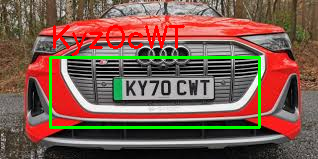

In [6]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the image
image_path = '/content/car3.jpg'  # Replace with your image
image = cv2.imread(image_path)

# Load Haar cascade for number plate detection
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect plates
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# Initialize OCR reader
reader = easyocr.Reader(['en'])

# Loop through detected plates
for (x, y, w, h) in plates:
    plate_img = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # OCR
    result = reader.readtext(plate_img)
    for detection in result:
        text = detection[1]
        print("Detected Plate Text:", text)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show result
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshowcv2.waitKey(0)cv2.destroyAllWindows()

In [8]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [10]:
import cv2
import easyocr
import numpy as np
import gradio as gr

# Load Haar cascade
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Character correction map
correction_map = {
    'z': '7',
    'Z': '7',
    'o': '0',
    'O': '0',
    'i': '1',
    'I': '1',
    'b': '8',
    'B': '8',
    'c': 'C',
    'C': 'C',
    'y': 'Y',
    'Y': 'Y'
}

# Function to correct text
def correct_text(text):
    corrected = ''
    for char in text:
        if char.upper().isalnum():
            corrected += correction_map.get(char, char).upper()
    return corrected

# Main function
def detect_plate_text(uploaded_image):
    image = cv2.cvtColor(np.array(uploaded_image), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    detected_text = ""
    for (x, y, w, h) in plates:
        plate_img = image[y:y+h, x:x+w]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        results = reader.readtext(plate_img)
        for detection in results:
            raw_text = detection[1]
            corrected_text = correct_text(raw_text)
            detected_text += corrected_text + " "
            cv2.putText(image, corrected_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    return image, detected_text.strip()

# Gradio interface
interface = gr.Interface(
    fn=detect_plate_text,
    inputs=gr.Image(type='pil'),
    outputs=[gr.Image(type='numpy', label="Detected Image"), gr.Textbox(label="Detected Plate Text")],
    title="License Plate Detector & OCR (Corrected)",
    description="Upload an image of a vehicle license plate. The system detects the plate and corrects common OCR errors like 'Z' → '7', 'o' → '0', etc."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fe132f640820aaa052.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
